In [17]:
# Import libraries

# Import the functions used in this project

# Pretty display for notebooks
%matplotlib inline


# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

import awesome_functions as af

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [227]:
len(df_test["VisitNumber"].unique())

95674

In [4]:
df_train.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [6]:
df_train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [27]:
def isThereNoneData(df, percentage=60):
    """
        Missing data, Trace data, - data의 개수정보를 받아서 만든 dataframe을 리턴한다.
        패러미터는 df와, 상기된 데이터들이 해당 컬럼에서 차지한 percentage정도를 출력하고싶을때 입력한다. 
        default는 60% 이상인 컬럼명을 출력한다.
    """
    columns = ["Column", "Row Count", "Missing Data", "M Data %"]
    li = list(df.columns)
    m_count_li = []
    m_percent_li = []
    row_count_li = []
    for l in li:
        m_count = 0
        if l not in ["Weekday", "DepartmentDescription"]:
            for i, contents in enumerate(df[l]):
                contents = float(contents)
                if np.isnan(contents):
                    m_count += 1
            m_count_li.append([l, m_count])
            
    return m_count_li

In [27]:
df_train.dtypes

TripType                   int64
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [28]:
for column in df_train.columns:
    unique_ = df_train[column].unique()
    print(column, len(unique_))
    print(unique_)
    print()
    print()

TripType 38
[999  30  26   8  35  41  21   6  42   7   9  39  25  38  15  36  20  37
  32  40   5   3   4  24  33  43  31  27  34  18  29  44  19  23  22  28
  14  12]


VisitNumber 95674
[     5      7      8 ... 191345 191346 191347]


Weekday 7
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


Upc 97715
[6.81131529e+10 6.05388160e+10 7.41081110e+09 ... 8.85306278e+10
 8.87439527e+10 5.44000008e+09]


ScanCount 39
[ -1   1   2   3   5   6   4  14  -2   9   7  10   8  -3  -5  11  16  -4
  13  15  30  -6  12  20 -12  19  46  23  -7  22  25  24  31  -9  51  17
  18  71 -10]


DepartmentDescription 69
['FINANCIAL SERVICES' 'SHOES' 'PERSONAL CARE' 'PAINT AND ACCESSORIES'
 'DSD GROCERY' 'MEAT - FRESH & FROZEN' 'DAIRY' 'PETS AND SUPPLIES'
 'HOUSEHOLD CHEMICALS/SUPP' nan 'IMPULSE MERCHANDISE' 'PRODUCE'
 'CANDY, TOBACCO, COOKIES' 'GROCERY DRY GOODS' 'BOYS WEAR'
 'FABRICS AND CRAFTS' 'JEWELRY AND SUNGLASSES' 'MENS WEAR' 'ACCESSORIES'
 'HOME MANAGEMENT' 'FROZEN FOODS' '

In [29]:
isThereNoneData(df_train)

[['TripType', 0],
 ['VisitNumber', 0],
 ['Upc', 4129],
 ['ScanCount', 0],
 ['FinelineNumber', 4129]]

In [35]:
index = df_train[np.isnan(df_train["Upc"])].index

In [30]:
def changeType(data):
    if type(data) is float:
        return 1
    else:
        return 0

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber', 'new'],
      dtype='object')

In [31]:
df_train["new"] = df_train["DepartmentDescription"].apply(changeType)

In [32]:
df_train["new"].unique()

array([0, 1])

In [33]:
len(df_train[df_train["new"] == 1])

1361

In [93]:
len(df_train[(df_train["new"] == 1) & (np.isnan(df_train["Upc"])) & (np.isnan(df_train["FinelineNumber"]))])

1361

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
    
model = KMeans(n_clusters = 38)

In [5]:
df_train.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [21]:
X = df_train[['VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber']]

In [22]:
X["Weekday"].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [40]:
X = X.dropna()

In [41]:
isThereNoneData(X)

[['VisitNumber', 0], ['Upc', 0], ['ScanCount', 0], ['FinelineNumber', 0]]

In [44]:
len(df_train) - len(X)

4129

In [42]:
len(X)

642925

In [23]:
def changeType(data):
    day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return int(day.index(data))

In [24]:
X["Weekday"] = X["Weekday"].apply(changeType)

In [46]:
X_ = X[['VisitNumber', 'Weekday', 'Upc', 'ScanCount', 'FinelineNumber']]

In [47]:
model.fit(X_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=38, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
target = model.predict(X_)

In [53]:
df_train_ = df_train.dropna()

In [66]:
target_predicted = pd.DataFrame(target, columns = ["target"])

In [68]:
test = pd.concat([df_train_, target_predicted], axis=1)

In [83]:
test["target"] = test["target"].apply(lambda a : int(a) if not np.isnan(a) else 0)

In [93]:
target_li = sorted(test["target"].unique())

In [ ]:
f, ax = plt.subplots(5, 4, figsize=(15, 12))

for idx, station in enumerate(sorted(weather_data_cp["station_nbr"].unique())):
    df = weather_data_cp.copy()
    station_weather = df[df["station_nbr"] == station]
    # Chck missing values 
    weather_data_null = station_weather.isnull().sum()
    weather_data_null = weather_data_null.drop(weather_data_null[weather_data_null == 0].index).sort_values(ascending=False)
    weather_data_missing = pd.DataFrame({'Missing Numbers' :weather_data_null})
    weather_data_null =  weather_data_null / len(weather_data_cp)*100
    # Barplot missing values
    sns.barplot(x=weather_data_null.index, y=weather_data_null\
               , ax = ax[idx//4, idx%4])
    ax[idx//4, 0].set_ylabel("Percentage")
    ax[idx//4, idx % 4].set_ylim(0, 1)
    ax[idx//4, idx % 4].set_xticks([])
    ax[idx//4, idx % 4].set_xlabel("Station" + str(station))

In [95]:
len(target_li)

38

In [110]:
tripType_li = sorted(df_train["TripType"].unique())

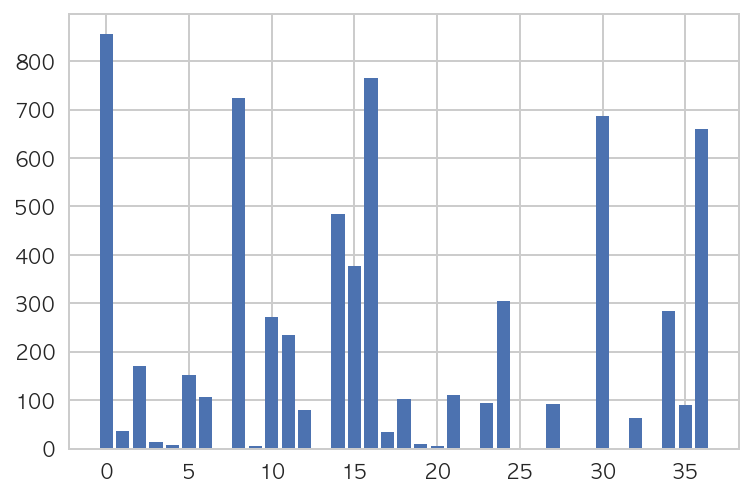

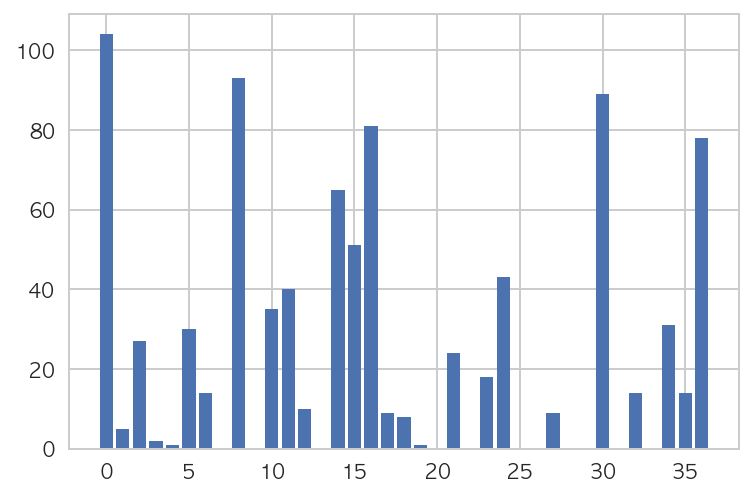

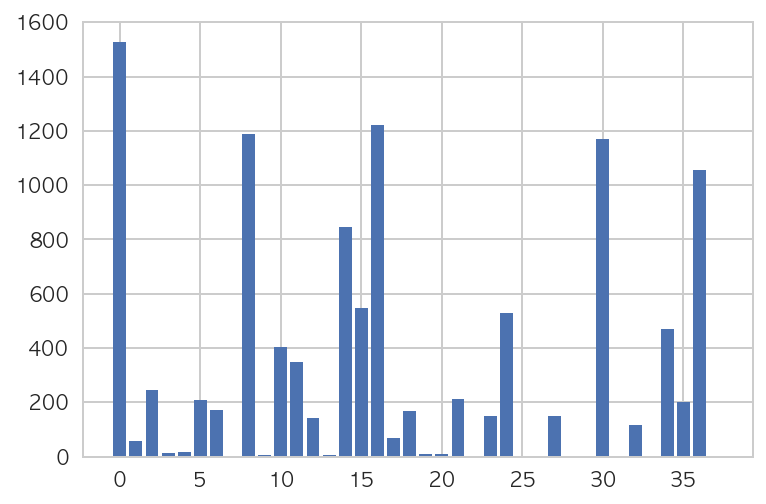

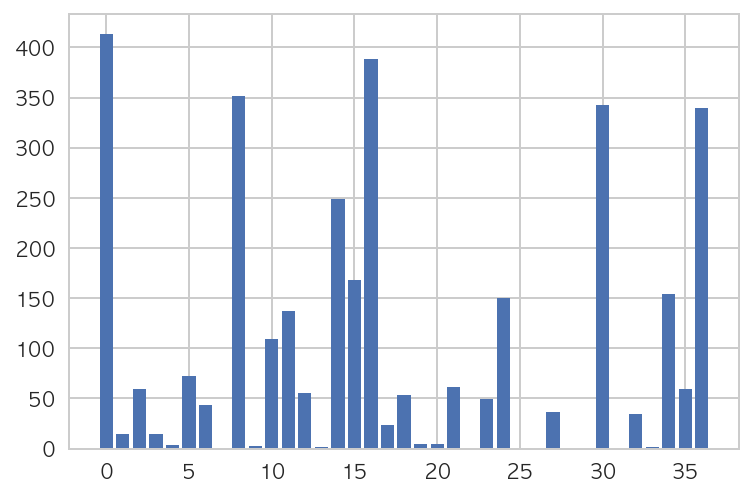

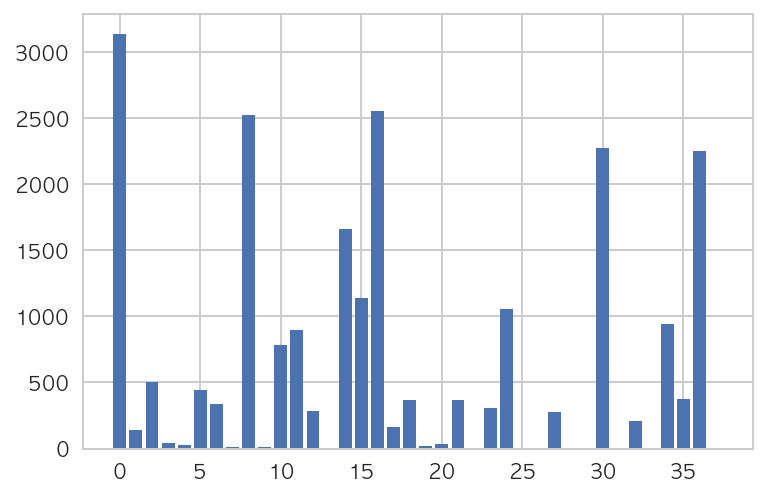

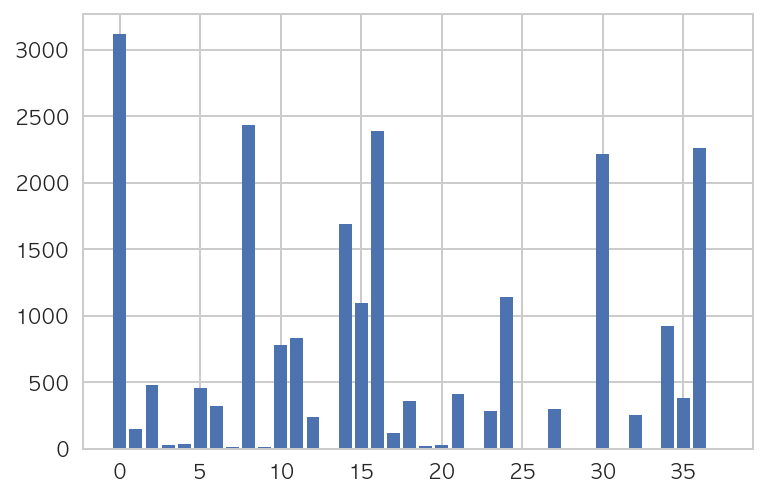

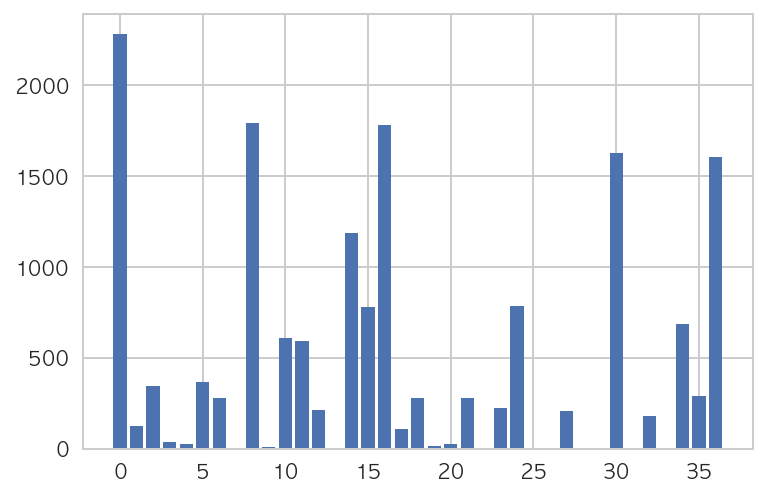

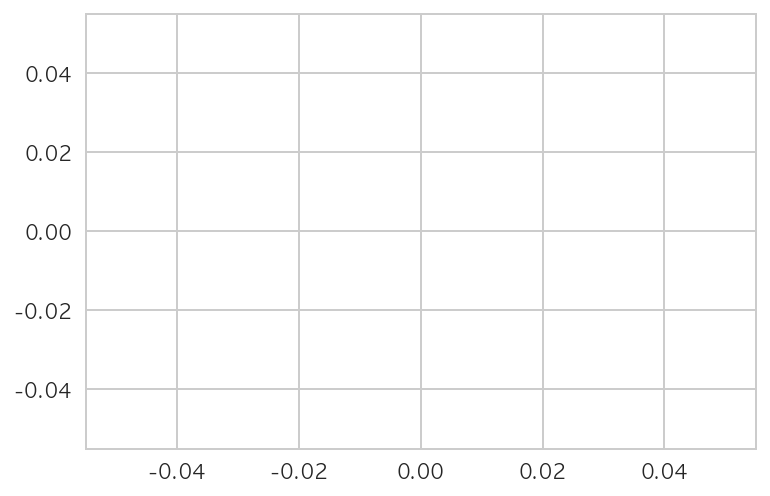

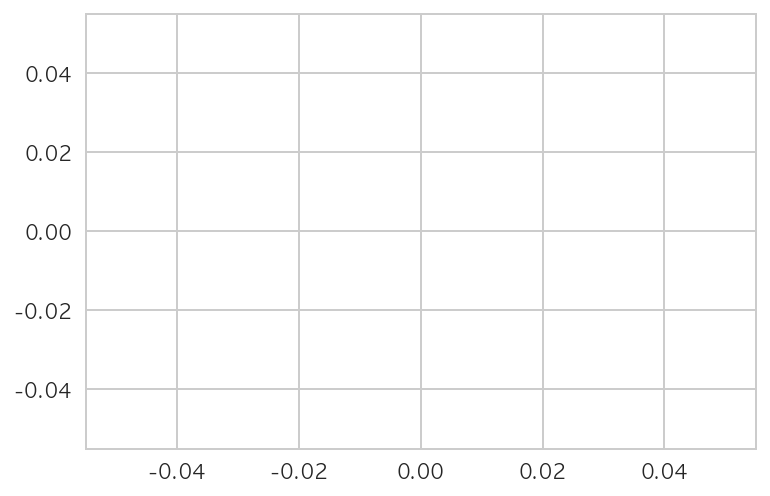

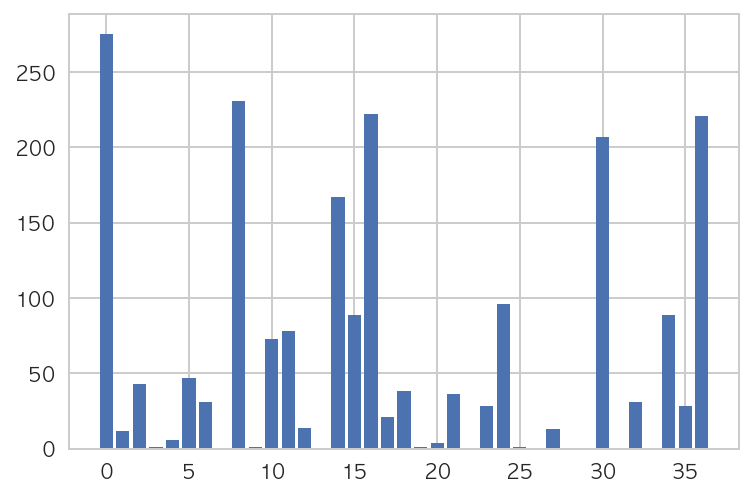

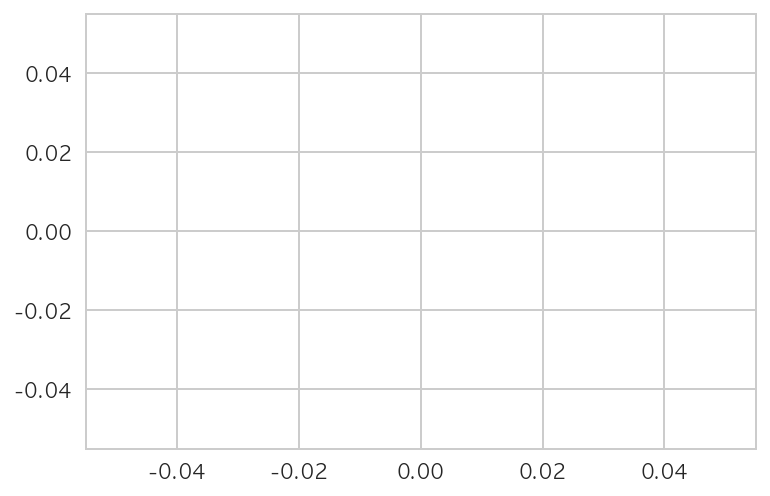

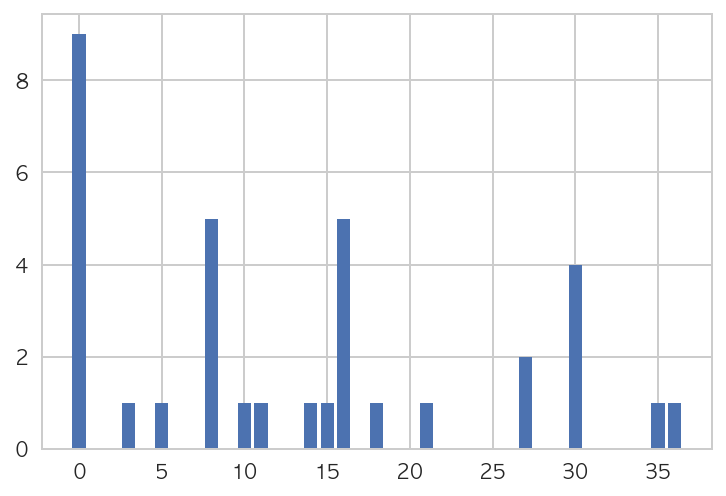

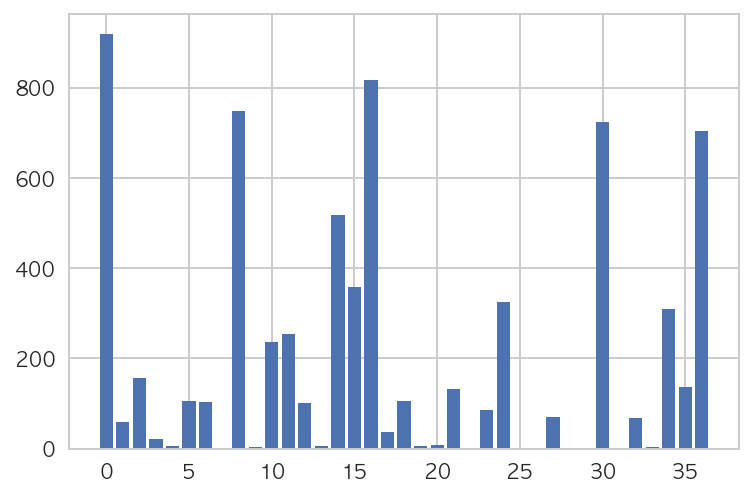

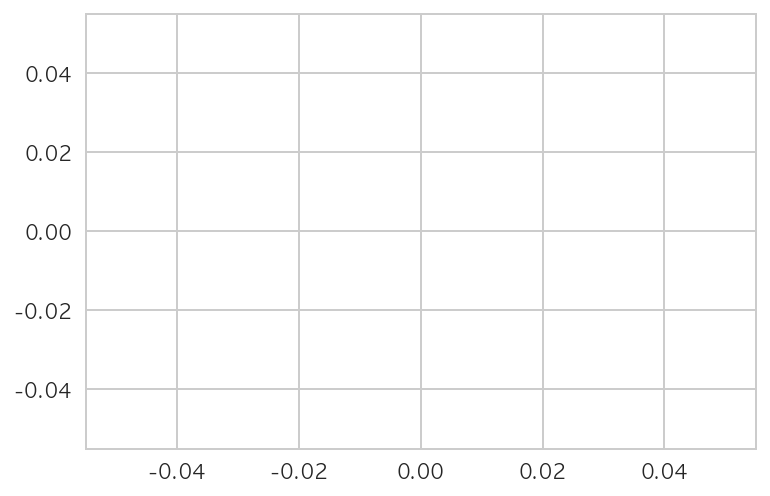

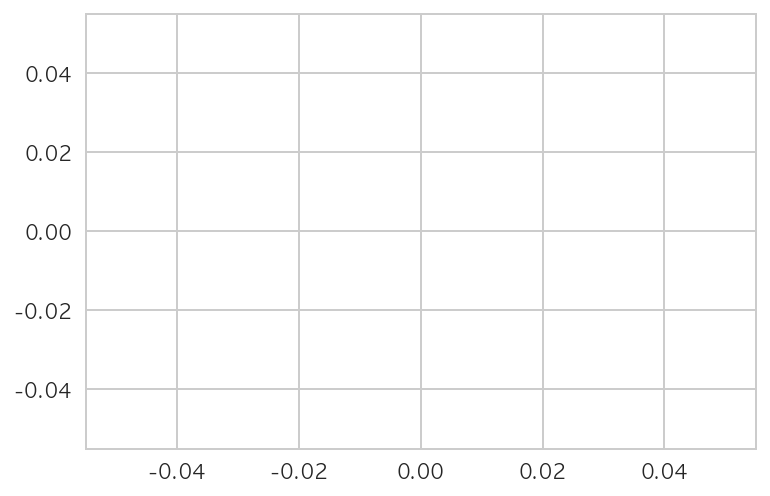

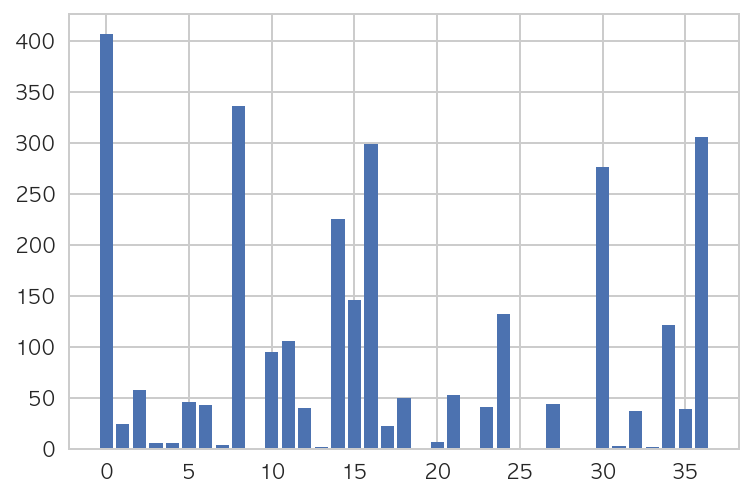

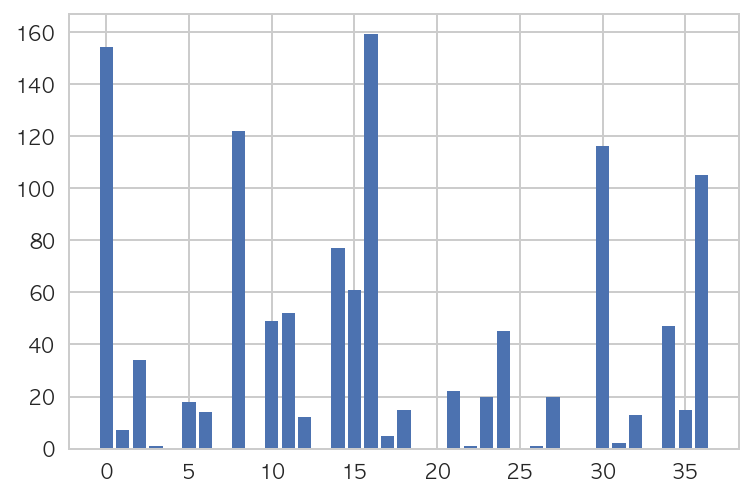

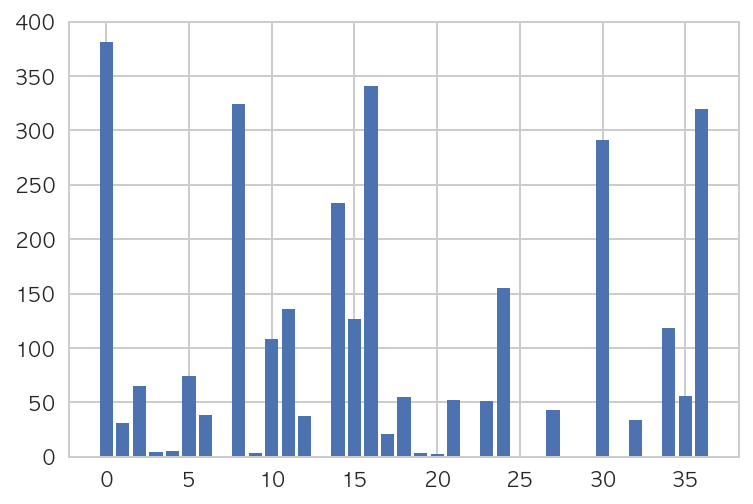

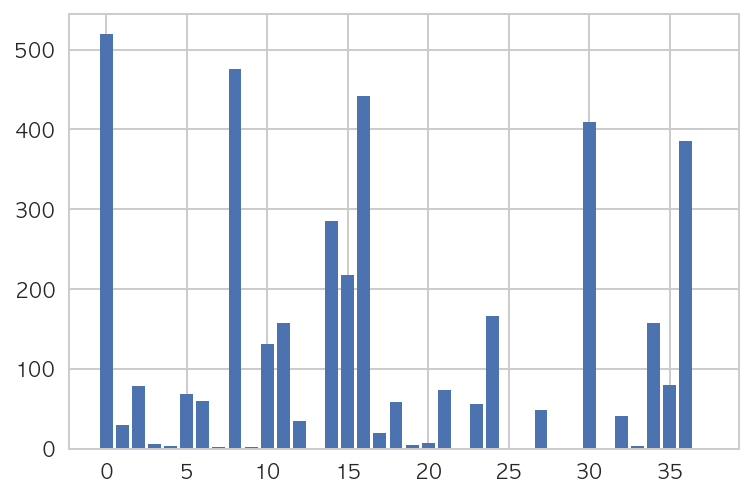

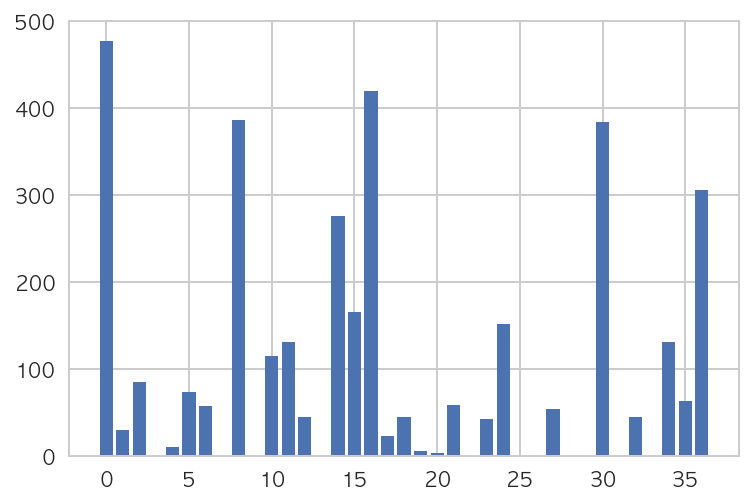

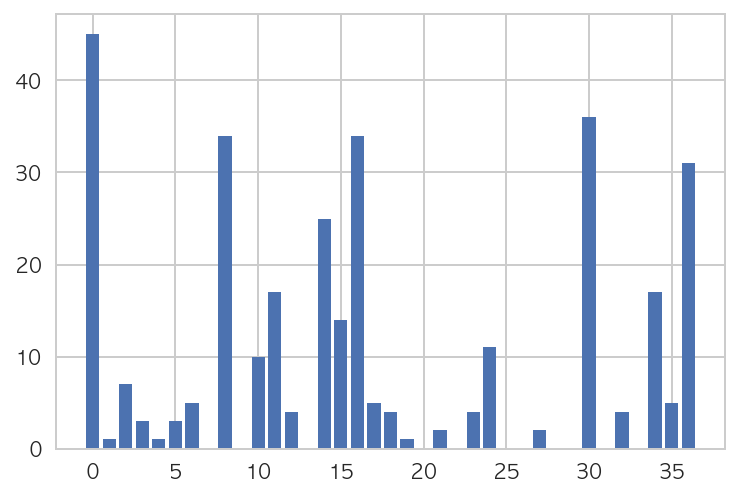

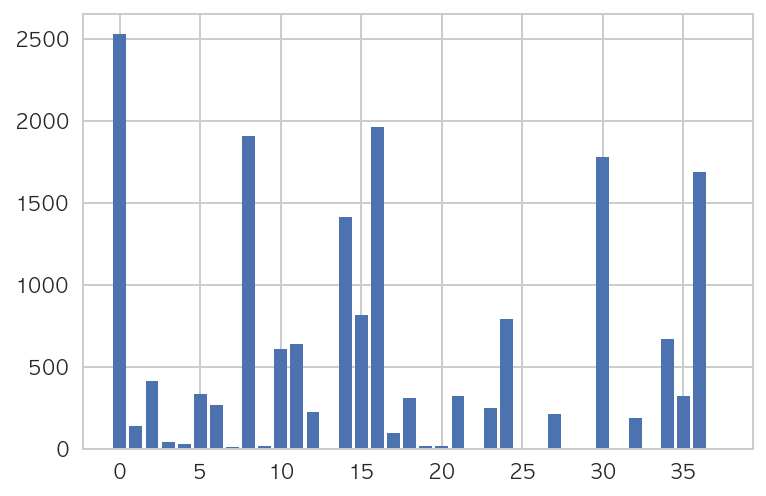

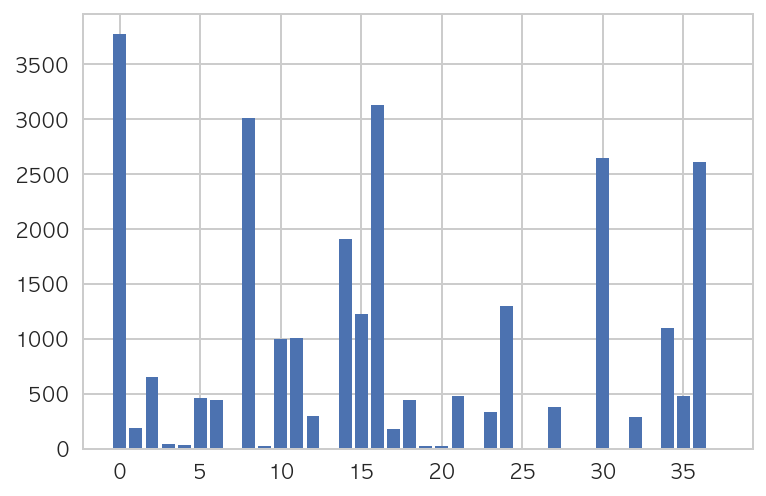

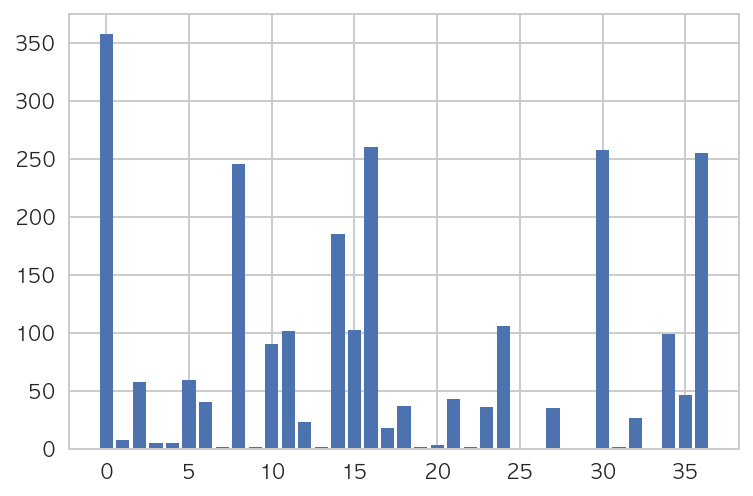

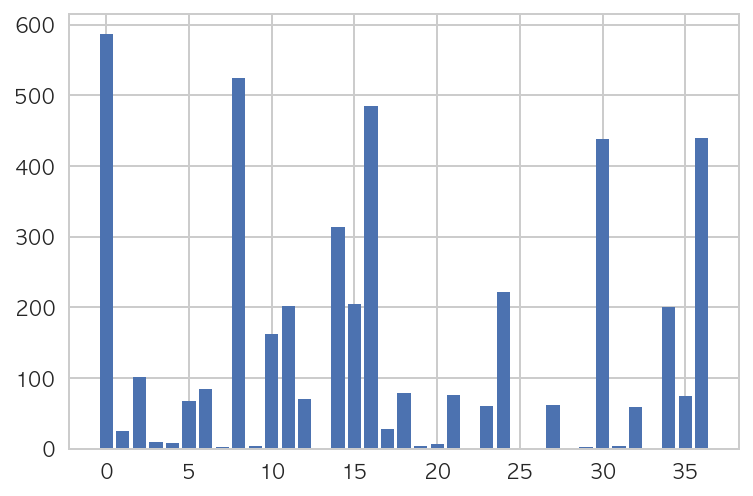

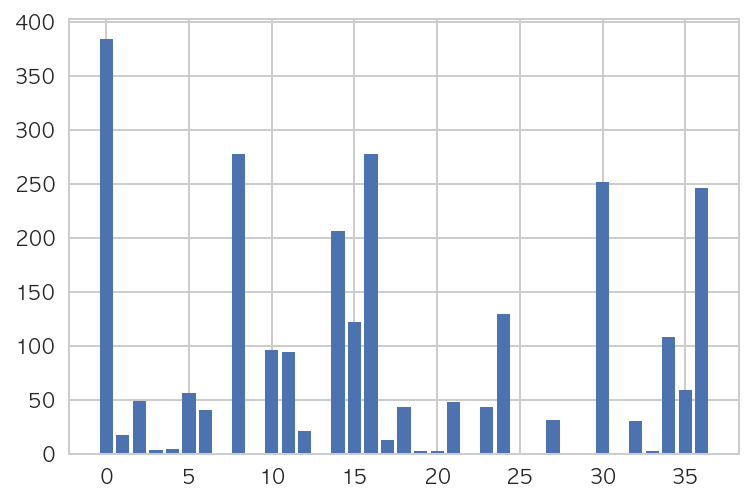

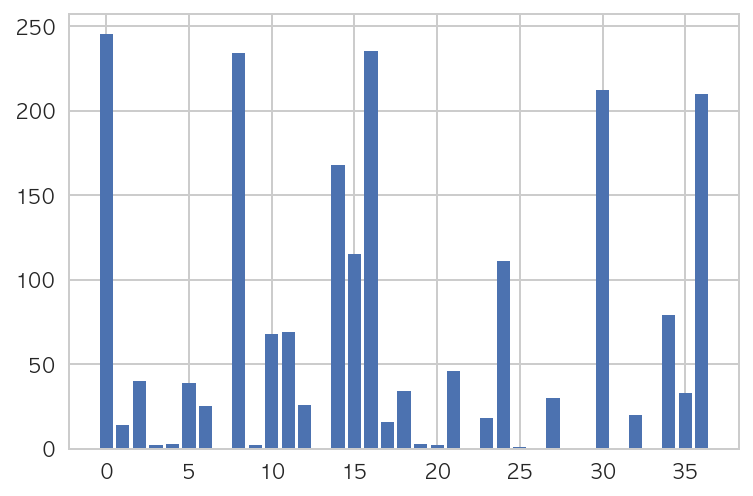

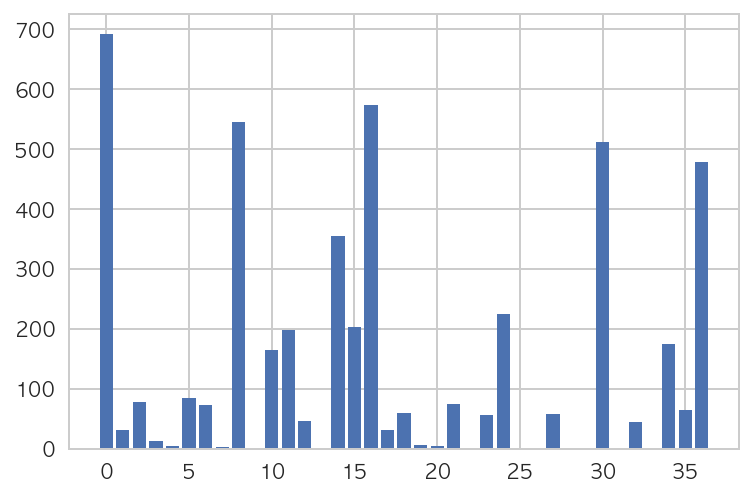

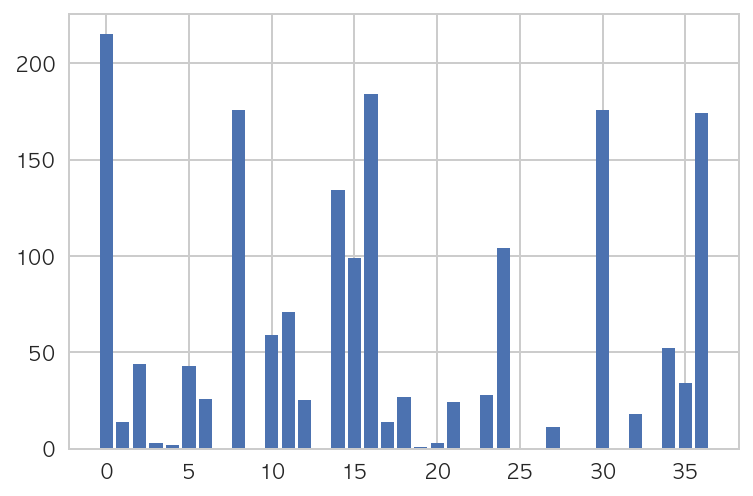

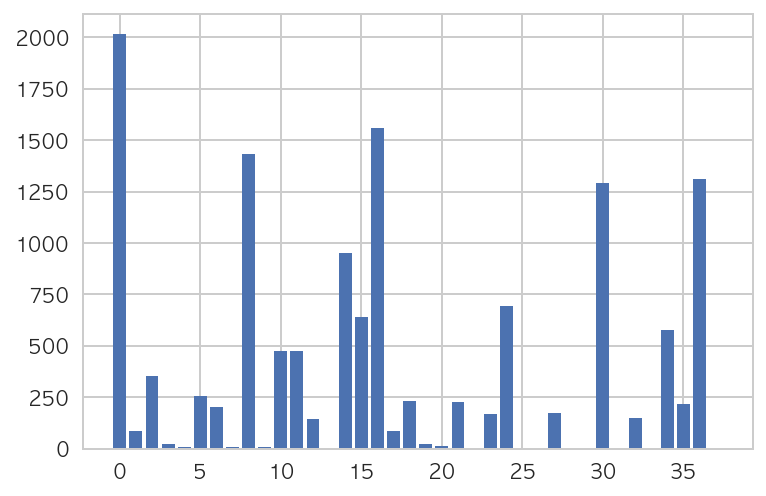

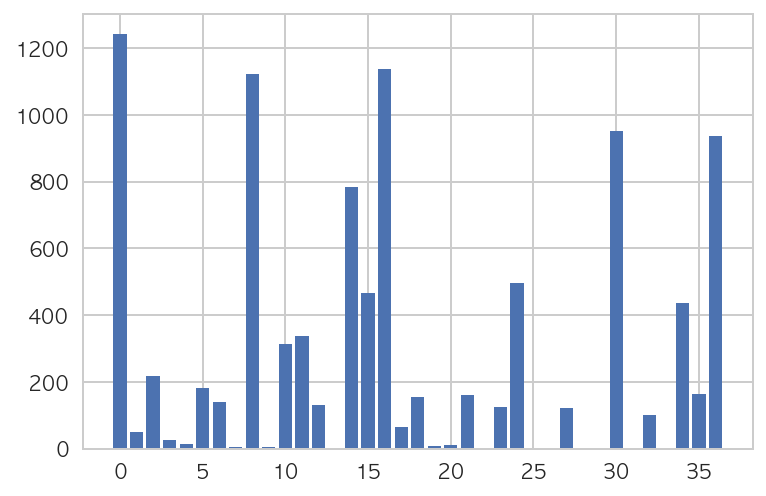

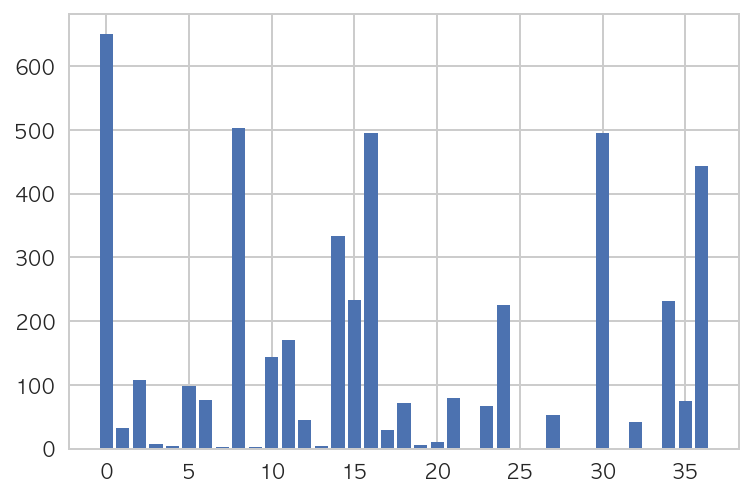

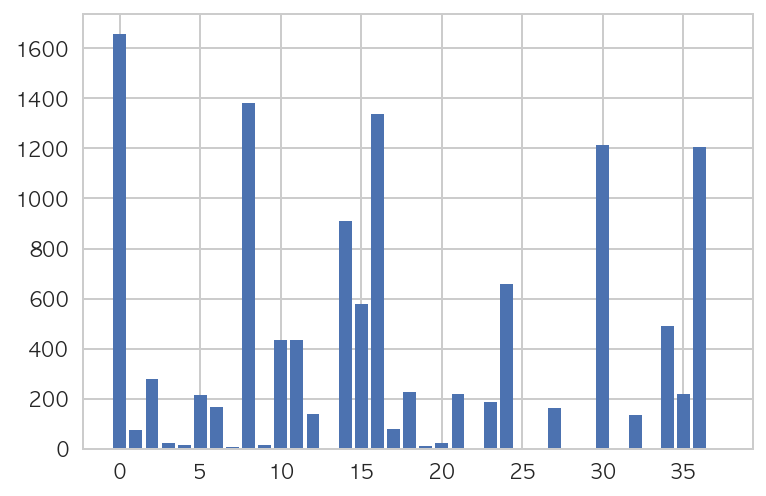

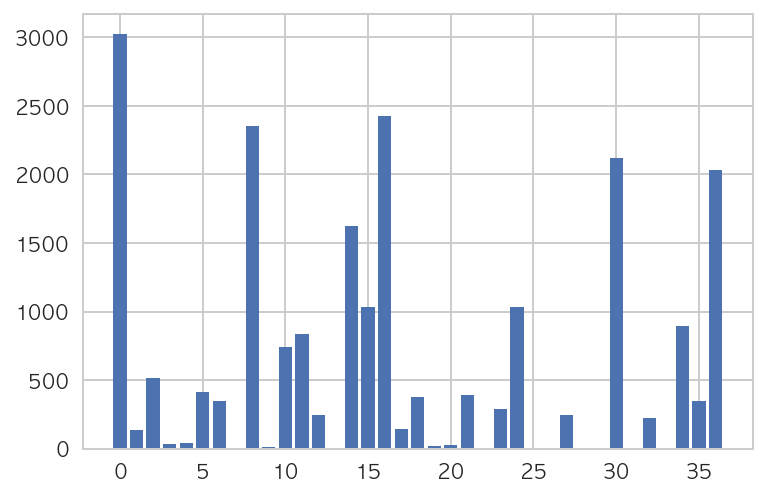

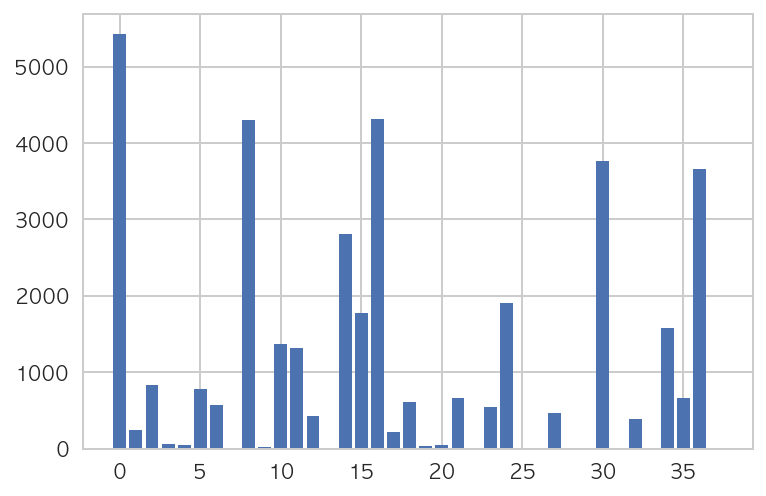

In [107]:
# f, ax = plt.subplots(5, 4, figsize=(15, 12))
for i, target in enumerate(target_li):
    if i >= 3:
        li = np.bincount(test[test["TripType"] == i]["target"])
        plt.bar(range(len(li)), li)
        plt.show()

In [112]:
arr = np.bincount(df_train["TripType"])

In [115]:
arr = arr[arr != 0]

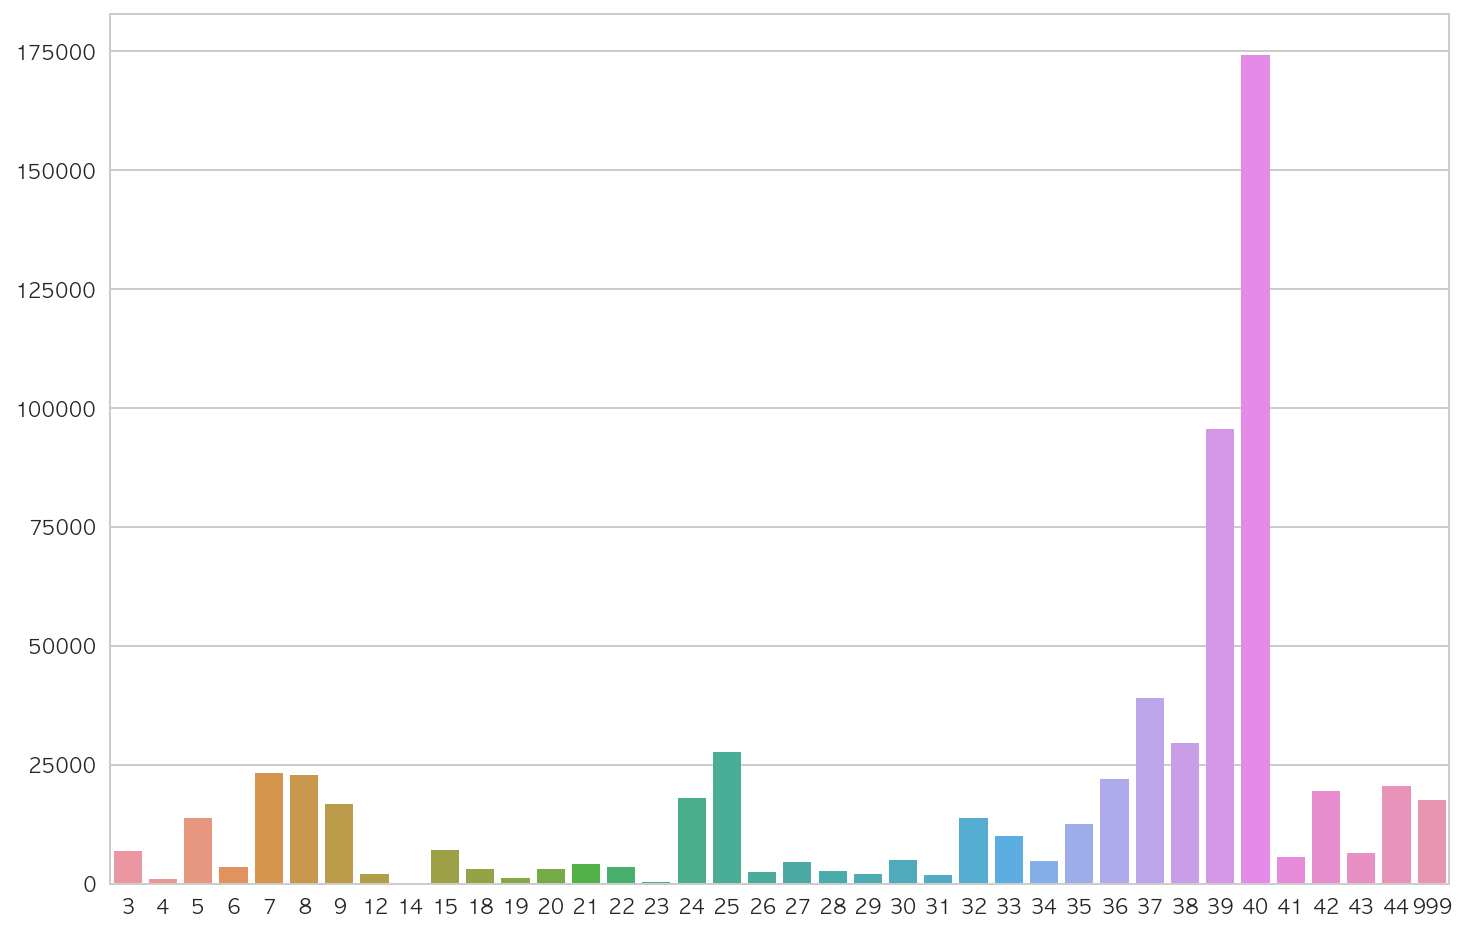

In [118]:
plt.figure(figsize=(12, 8))
sns.barplot(tripType_li, arr)
plt.show()

In [127]:
arr

array([  6827,    901,  13836,   3405,  23199,  22844,  16820,   2108,
           35,   7147,   2977,   1188,   3116,   4032,   3592,    325,
        18015,  27609,   2507,   4613,   2664,   2105,   4861,   1765,
        13843,   9918,   4751,  12501,  21990,  38954,  29565,  95504,
       174164,   5508,  19468,   6383,  20424,  17590])

In [132]:
visit_number_li = df_train["VisitNumber"].unique()

In [134]:
count = 0
for vn in visit_number_li:
    trip_types = df_train[df_train["VisitNumber"] == vn]["TripType"].unique()
    if len(trip_types) > 1:
        count += 1  
count 

0

In [130]:
df_train[df_train["VisitNumber"] == 5]["TripType"].unique()

array([999])

In [199]:
df_train.VisitNumber.value_counts()

72439     209
88011     151
9181      113
60971     112
65792     111
80318     104
178154     98
181457     97
84786      97
59358      96
179810     94
78556      94
79977      94
143651     93
170029     93
97101      91
105804     91
92740      89
139425     89
74005      89
119639     89
49461      86
107756     86
145744     86
36506      86
58240      85
105052     84
55716      83
80051      82
94422      82
         ... 
106065      1
43808       1
80658       1
7777        1
119567      1
121614      1
38183       1
134516      1
69908       1
38000       1
76051       1
117007      1
114958      1
121101      1
112897      1
151420      1
161659      1
145267      1
143216      1
188270      1
28472       1
93263       1
57134       1
50989       1
61224       1
67349       1
117851      1
148861      1
23657       1
2047        1
Name: VisitNumber, Length: 95674, dtype: int64

In [169]:
zip_vn_tt = zip(df_train.VisitNumber.value_counts().index, df_train.VisitNumber.value_counts().values)

In [217]:
li_ = np.arange(210)

In [218]:
li_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [205]:
y_li = np.bincount(df_train.VisitNumber.value_counts().values)

In [225]:
idx_mask = []
for i, vn in enumerate(df_train.VisitNumber.value_counts()):
    if df_train.VisitNumber.value_counts().values[i] == 1:
        idx_mask.append(vn)

In [189]:
from patsy import dmatrix

In [190]:
dd = pd.DataFrame(dmatrix("C(DepartmentDescription) + 0", data=df_train))

In [196]:
len(df_train) - len(dd)

1361